## Image segmentation with CamVid

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [3]:
path = untar_data(URLs.CAMVID, dest='/data/')
path = Path('/data/camvid')
path.ls()

[PosixPath('/data/camvid/codes.txt'),
 PosixPath('/data/camvid/labels'),
 PosixPath('/data/camvid/images'),
 PosixPath('/data/camvid/valid.txt')]

In [4]:
path_lbl = path/'labels'
path_img = path/'images'

## Subset classes

In [5]:
# path = Path('./data/camvid-small')

# def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

# codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
#     'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

# src = (SegmentationItemList.from_folder(path)
#        .split_by_folder(valid='val')
#        .label_from_func(get_y_fn, classes=codes))

# bs=8
# data = (src.transform(get_transforms(), tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))

## Data

In [6]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/data/camvid/images/Seq05VD_f00360.png'),
 PosixPath('/data/camvid/images/0006R0_f01410.png'),
 PosixPath('/data/camvid/images/0001TP_006750.png')]

In [7]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/data/camvid/labels/0001TP_008550_P.png'),
 PosixPath('/data/camvid/labels/0001TP_008190_P.png'),
 PosixPath('/data/camvid/labels/0016E5_05850_P.png')]

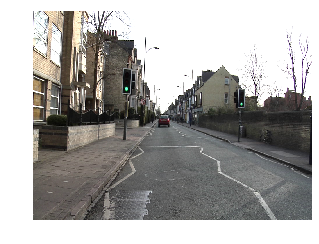

In [8]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

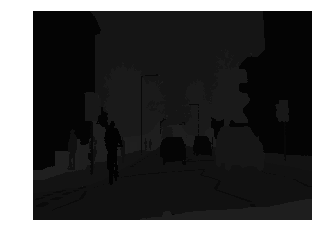

In [9]:
img_lbl = lbl_names[0]
img = open_image(img_lbl)
img.show(figsize=(5,5))

In [10]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [11]:
get_y_fn(img_f)

PosixPath('/data/camvid/labels/Seq05VD_f00360_P.png')

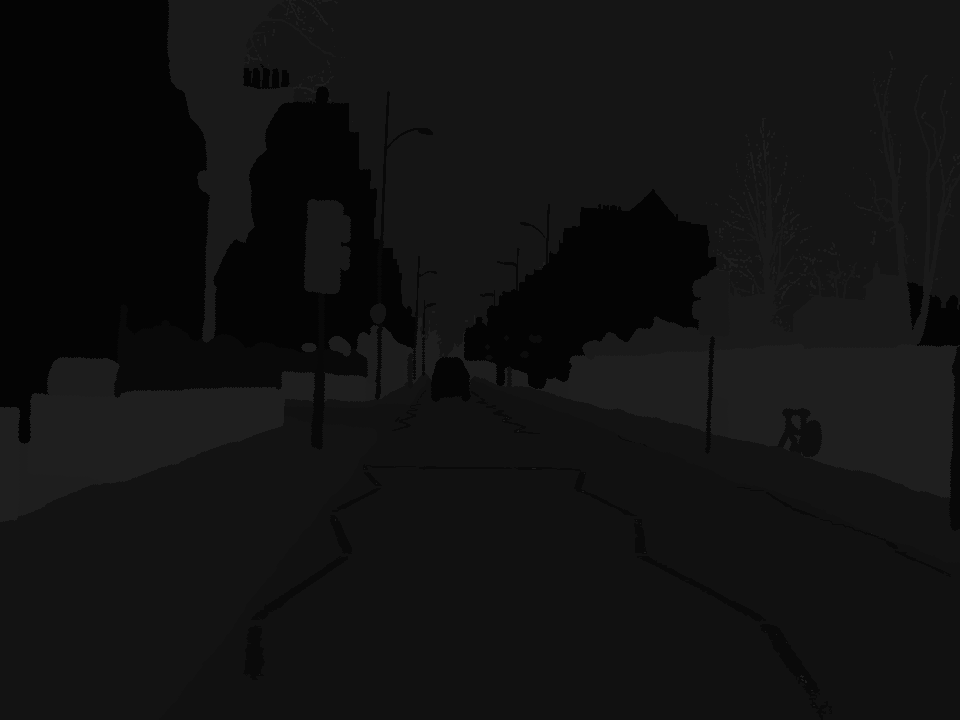

In [12]:
from IPython.display import Image as IImage
IImage('/data/camvid/labels/Seq05VD_f00360_P.png')

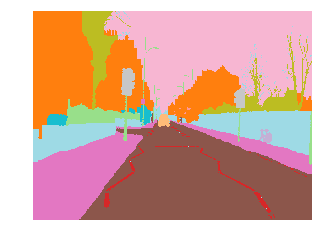

In [13]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [14]:
type(mask)

fastai.vision.image.ImageSegment

In [15]:
dir(mask)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_affine_mat',
 '_flow',
 '_logit_px',
 '_px',
 '_repr_image_format',
 '_repr_jpeg_',
 '_repr_png_',
 'affine',
 'affine_mat',
 'apply_tfms',
 'brightness',
 'clone',
 'contrast',
 'coord',
 'crop',
 'crop_pad',
 'cutout',
 'data',
 'device',
 'dihedral',
 'dihedral_affine',
 'flip_affine',
 'flip_lr',
 'flow',
 'jitter',
 'lighting',
 'logit_px',
 'pad',
 'perspective_warp',
 'pixel',
 'px',
 'reconstruct',
 'refresh',
 'resize',
 'rotate',
 'sample_kwargs',
 'save',
 'set_sample',
 'shape',
 'show',
 'size',
 'skew',
 'squish',
 'symmetric_warp',
 'tilt',
 'zoom',
 'zoom_squish']

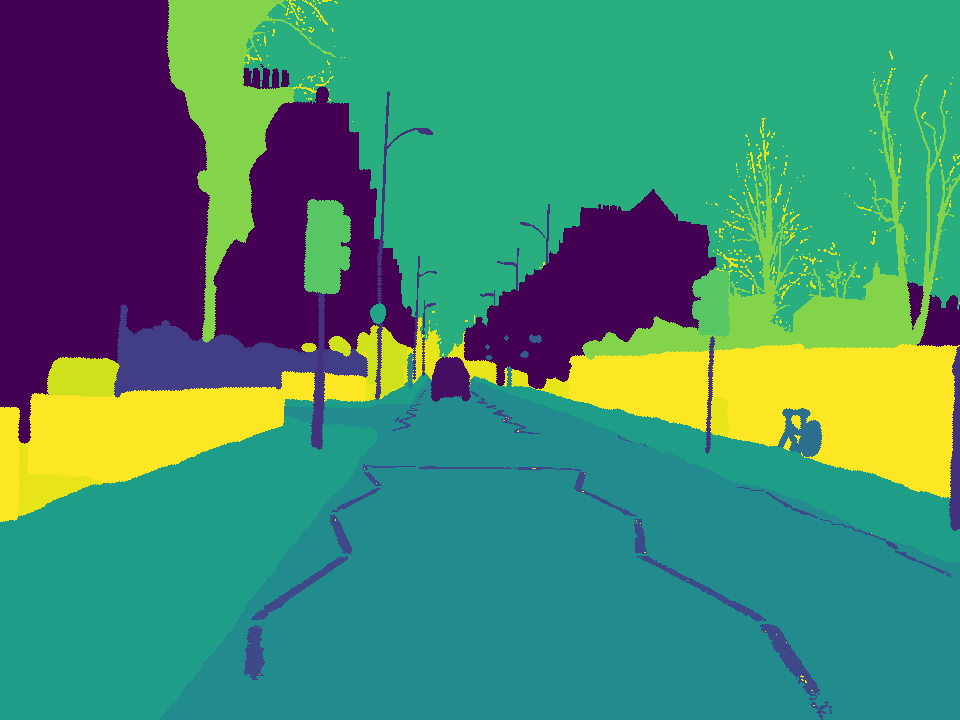

In [16]:
mask

In [17]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17]]]))

In [18]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Datasets

In [19]:
size = src_size//2
bs=8

In [20]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [21]:
src

LabelLists;

Train: LabelList
y: SegmentationLabelList (600 items)
[ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960)]...
Path: /data/camvid/images
x: SegmentationItemList (600 items)
[Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960)]...
Path: /data/camvid/images;

Valid: LabelList
y: SegmentationLabelList (101 items)
[ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960), ImageSegment (1, 720, 960)]...
Path: /data/camvid/images
x: SegmentationItemList (101 items)
[Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960), Image (3, 720, 960)]...
Path: /data/camvid/images;

Test: None

In [22]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

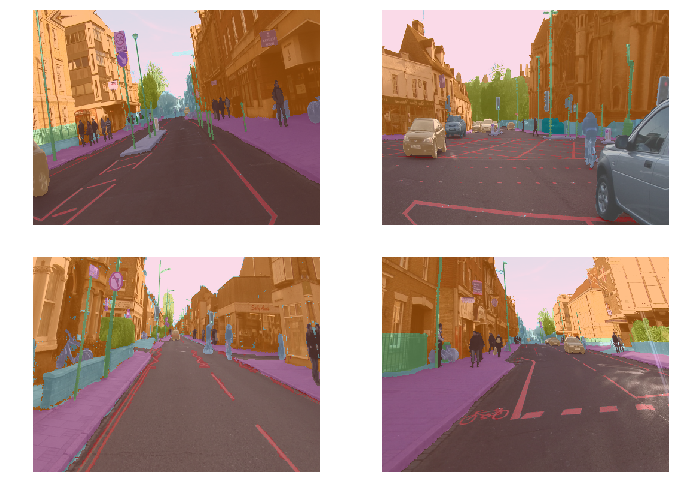

In [23]:
data.show_batch(2, figsize=(10,7))

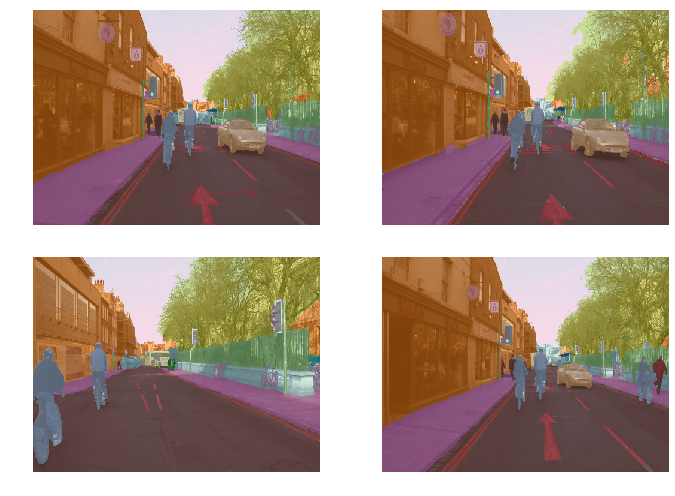

In [24]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [25]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [26]:
metrics=acc_camvid
# metrics=accuracy

In [27]:
wd=1e-2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


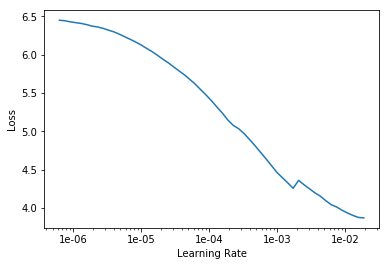

In [93]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


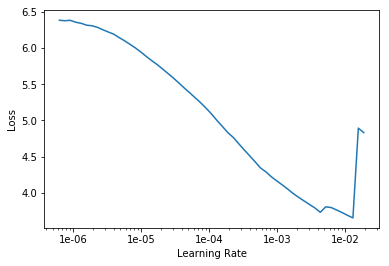

In [94]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)
lr_find(learn)
learn.recorder.plot()

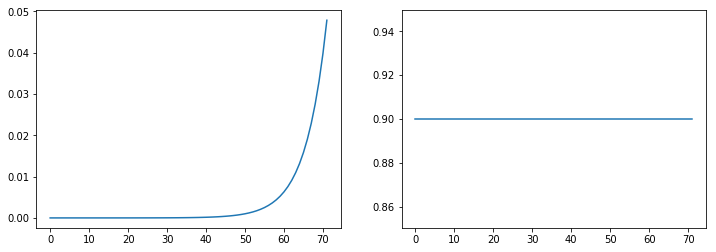

In [95]:
learn.recorder.plot_lr(show_moms=True)

In [97]:
lr=3e-3

In [98]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid
1,1.409509,0.959130,0.773060
2,0.905433,0.614648,0.828279
3,0.727063,0.548608,0.858170
4,0.682890,0.570274,0.844393
5,0.633123,0.490313,0.867269
6,0.559957,0.497424,0.878313
7,0.620802,0.490580,0.860863
8,0.551717,0.442786,0.875658
9,0.527860,0.415189,0.889117
10,0.455625,0.341600,0.905553


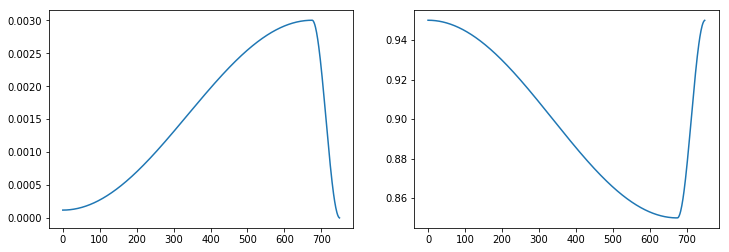

In [99]:
learn.recorder.plot_lr(show_moms=True)

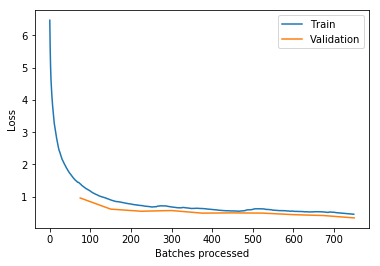

In [100]:
learn.recorder.plot_losses()

In [101]:
learn.save('stage-1')

In [102]:
learn.load('stage-1');

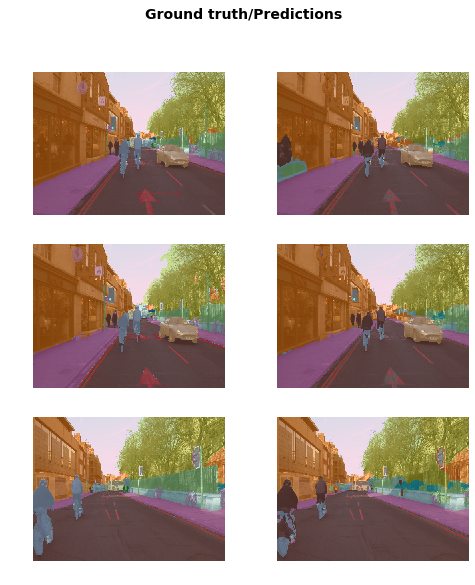

In [103]:
learn.show_results(rows=3, figsize=(8,9))

In [104]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


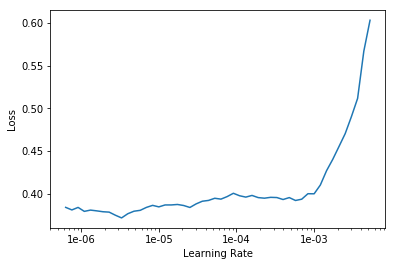

In [105]:
lr_find(learn)
learn.recorder.plot()

In [108]:
slice(lr/400,lr/4)

slice(7.5e-06, 0.00075, None)

In [109]:
lrs = slice(lr/400,lr/4)

In [110]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid
1,0.388842,0.323234,0.909004
2,0.376085,0.311405,0.913250
3,0.370356,0.317558,0.908131
4,0.357809,0.318254,0.905956
5,0.349737,0.302161,0.910639
6,0.342041,0.303136,0.912381
7,0.332625,0.280604,0.919577
8,0.318377,0.328433,0.904303
9,0.321767,0.287410,0.917398
10,0.309380,0.309579,0.911214


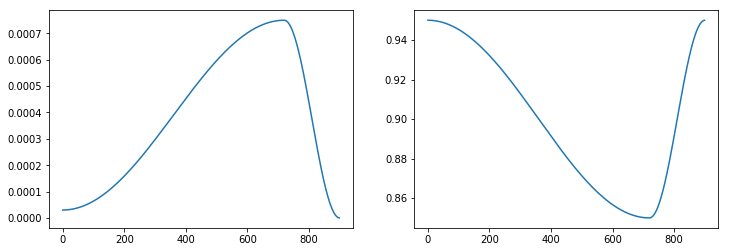

In [111]:
learn.recorder.plot_lr(show_moms=True)

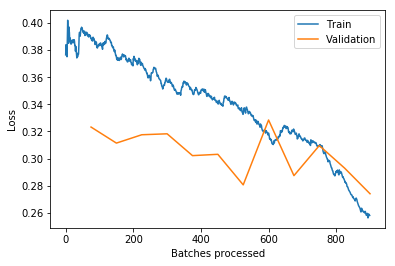

In [112]:
learn.recorder.plot_losses()

In [113]:
learn.save('stage-2');

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [28]:
size = src_size
bs=3

In [29]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [30]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [31]:
learn.load('stage-2');

In [32]:
lr_find(learn)
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA error: out of memory

In [ ]:
lr=1e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid
1,0.366140,0.339497,0.908682
2,0.333278,0.304011,0.916702
3,0.326025,0.305404,0.919941
4,0.336885,0.321342,0.910933
5,0.326935,0.305589,0.919401
6,0.347779,0.333608,0.908895
7,0.328334,0.352358,0.905482
8,0.327277,0.387525,0.912187
9,0.291777,0.293065,0.918046
10,0.228348,0.257859,0.929750


In [ ]:
learn.save('stage-1-big')

In [ ]:
learn.load('stage-1-big');

In [ ]:
learn.unfreeze()

In [ ]:
lrs = slice(1e-6,lr/10)

In [ ]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid
1,0.225999,0.254650,0.930782
2,0.216341,0.256007,0.930751
3,0.209800,0.255649,0.930709
4,0.203509,0.252857,0.931682
5,0.202308,0.258498,0.931308
6,0.200796,0.257311,0.931915
7,0.204560,0.251486,0.933218
8,0.192893,0.254977,0.932786
9,0.189505,0.258091,0.932555
10,0.190156,0.256064,0.933315


In [ ]:
learn.save('stage-2-big')

In [ ]:
learn.load('stage-2-big');

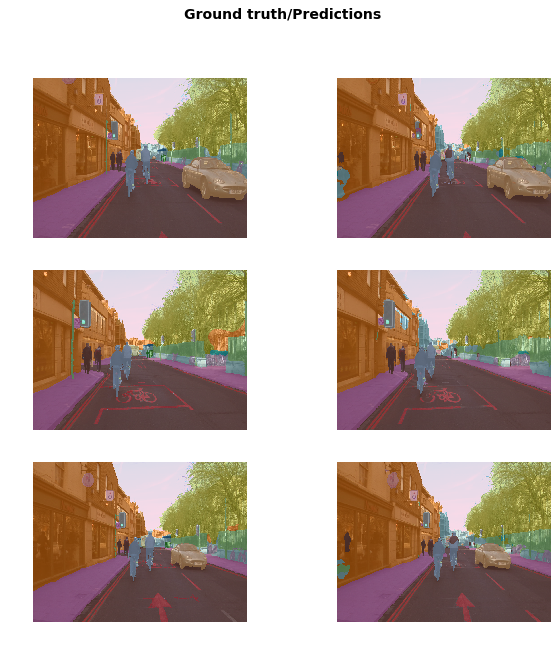

In [ ]:
learn.show_results(rows=3, figsize=(10,10))

## fin